# Combining all datasets into one single database

### This notebook works with many datasets of FI (microthermometry, Raman, and LAICPMS)

The many datasets are processed by their respective scripts, outside this notebook, and are here combined into one single database containing all the data for each FI

In [1]:
# ---------------- processing FI data from raw data to combined database
        
# --- import modules
# import time
# import math
# import random

import os
import glob

import pandas as pd
import numpy as np # For data manipulation
# import scipy # For data manipulation

import matplotlib.pyplot as plt # For doing the plots
import plotly.express as px
# import plotly.graph_objects as go

# import rampy as rp

# import lmfit
# from lmfit.models import GaussianModel


# --- set working directory

data_dir = "C:/Users/u0125722/OneDrive - KU Leuven/Buranga/_Article3-MH_transition/"

base_dir = "C:/Users/u0125722/OneDrive - KU Leuven/Buranga/"
Raman_dir = '_Article3-MH_transition/Raman/processed/'
LA_dir = 'LA-ICP-MS/output/'
Termo_dir = 'Microthermometry/_output/'

# Raman data

In [2]:
# --- create dataframe from csv file using pandas import command 

df_Raman = pd.read_csv(base_dir + Raman_dir + 'FI_Raman_V_composition.csv', 
                    encoding = "ANSI")

df_Raman.drop_duplicates(['sample','piece','field','analysis'], keep='last',inplace=True)

df_Raman['field'] = df_Raman['field'].astype(str).replace(('07','ore1','ore2','trl','Trl','brt','qtz','scz'),
                                                          ('7','ffore1','ffore2','ff','ff','ff','ff','ff'),
                                                          regex=True)
print(df_Raman.columns)

df_Raman = df_Raman.drop(columns=['area_CO2_v1','area_CO2_v2','area_N2','area_CH4', 
                                  'CO2_v1_mol', 'CO2_v2_mol', 'N2_mol', 'CH4_mol', 'laser', 'rest',
       'cross_section_CO2_v1', 'cross_section_CO2_v2', 'cross_section_N2',
       'cross_section_CH4'])

df_Raman

Index(['sample', 'piece', 'field', 'analysis', 'XCO2(mol%)', 'XN2(mol%)',
       'XCH4(mol%)', 'area_CO2_v1', 'area_CO2_v2', 'area_N2', 'area_CH4',
       'CO2_v1_mol', 'CO2_v2_mol', 'N2_mol', 'CH4_mol', 'laser', 'rest',
       'cross_section_CO2_v1', 'cross_section_CO2_v2', 'cross_section_N2',
       'cross_section_CH4'],
      dtype='object')


,sample,piece,field,analysis,XCO2(mol%),XN2(mol%),XCH4(mol%)
2,BU18FA02a,A,ff1,fi01,0.963,0.037,0.000
4,BU18FA02a,A,ff1,fi02,0.950,0.050,0.000
6,BU18FA02a,A,ff1,fi03,0.947,0.053,0.000
8,BU18FA02a,A,ff1,fi04,0.948,0.052,0.000
10,BU18FA02a,A,ff1,fi05,0.952,0.048,0.000
...,...,...,...,...,...,...,...
297,BU18FA32,C,ff1,fi06,0.864,0.135,0.001
298,BU18FA32,C,ff1,fi07,0.870,0.122,0.007
299,BU18FA32,C,ff1,fi08,0.885,0.113,0.002
300,BU18FA32,C,ff1,fi09,0.869,0.128,0.003


# Microthermometry data

In [3]:
# --- create dataframe from csv file using pandas import command 

df_thermo = pd.read_csv(base_dir + Termo_dir + "Buranga_microthermometry_processed.csv", 
                    encoding = "ANSI", 
                   index_col = 0)

df_thermo = df_thermo.rename(columns={"FI": "analysis"})

df_thermo['field'] = df_thermo['field'].astype(str).replace(('FF'),('ff'),regex=True)
df_thermo['analysis'] = 'fi0' + df_thermo['analysis'].astype(str)

df_thermo = df_thermo.drop(columns=['Type','Symbol'])

df_thermo

,sample,piece,field,analysis,Host,Length,Width,Phases,VL (%),VV (%),...,Te,Tm Hh,Tm H2O,Tm CL,Th CO2,Hmg Mode,Color,salinity(NaCleq wt%),salChen(NaCleq wt%),salBod(NaCleq%)
1,BU18FA22,A,ff1,fi01,quartz,9.1,7.4,L - V,75.0,25.0,...,-62.880406,NaN,NaN,NaN,NaN,NaN,grey,NaN,NaN,NaN
2,BU18FA22,A,ff1,fi02,quartz,9.8,7.8,L - V,72.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,grey,NaN,NaN,NaN
3,BU18FA22,A,ff2,fi01,quartz,24.8,13.3,L - V,73.0,27.0,...,-72.914963,-25.437852,-18.954633,0.794249,NaN,NaN,grey,14.700080,14.690850,21.652316
4,BU18FA22,A,ff2,fi02,quartz,13.8,8.9,L - V,80.0,20.0,...,-24.592817,-24.592817,-16.007713,NaN,NaN,NaN,grey,NaN,NaN,19.452391
5,BU18FA22,A,ff2,fi03,quartz,14.1,10.2,L - V,77.0,23.0,...,-26.665083,-26.665083,-16.698469,0.373059,NaN,NaN,grey,15.187212,15.188781,19.992090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,BU18FA19(2),A,ff1,fi010,augelite,NaN,NaN,L - V,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,yellow,NaN,NaN,NaN
274,BU18FA04,C,ff8,fi01,trolleite,NaN,NaN,L - V,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,orange,NaN,NaN,NaN
275,BU18FA04,C,ff8,fi03,trolleite,NaN,NaN,L - V,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,orange,NaN,NaN,NaN
276,BU18FA04,C,ff8,fi04,trolleite,NaN,NaN,L - V - S,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,orange,NaN,NaN,NaN


# LAICPMS data

In [4]:
# --- create dataframe from csv file using pandas import command 

df_LA = pd.read_csv(base_dir + LA_dir + 'Buranga_FI_LAICPMS_bdl_mol.csv', 
                    encoding = "ANSI")

df_LA = df_LA.drop(columns=['Info'])


df_LA

,sample,piece,field,analysis,Host,Li,B,Na,Mg,Al,...,Li%,K%,Rb%,Cs%,B%,P%,diva,diva%,Alkalis,Alkalis%
0,BU18FA20,B,ff4,fi01,bertossaite,NaN,0.037655,3.207918,NaN,NaN,...,NaN,2.890657,0.133099,0.095272,0.040702,3.247818,0.045752,0.252384,3.970001,10.493861
1,BU18FA20,B,ff4,fi02,bertossaite,0.903192,0.037864,2.542792,NaN,NaN,...,0.626878,1.833952,0.110780,0.101552,0.040928,4.066315,0.003519,0.019335,3.935656,8.518907
2,BU18FA20,B,ff4,fi03,bertossaite,1.251982,0.029580,2.102782,0.001446,NaN,...,0.868963,2.538475,0.100304,0.071961,0.031973,2.402430,0.283398,1.229747,4.021179,8.413887
3,BU18FA20,J,ff1,fi01,trolleite,0.053668,0.226875,1.409495,0.052687,NaN,...,0.037249,2.739841,0.162818,0.097923,0.245232,1.646108,0.144746,0.640089,2.190349,6.278185
4,BU18FA20,J,ff1,fi02,trolleite,0.021679,0.123154,1.349156,0.007145,NaN,...,0.015047,3.073082,0.110642,0.046022,0.133118,NaN,0.010826,0.037591,2.173244,6.346431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,BU18FA04,C,ff8,fi03,trolleite,0.202083,0.129599,0.855733,0.000966,NaN,...,0.140260,4.660214,0.204102,0.030185,0.140085,50.656876,0.011044,0.057713,2.275909,7.002044
116,BU18FA19,E,ff11b,fi03,quartz,0.961234,NaN,1.315566,0.029491,2.761715,...,0.667164,1.751252,0.106032,0.009149,NaN,5.103288,3.754273,16.168806,2.737811,5.558012
117,BU18FA19,E,ff11b,fi04,quartz,NaN,0.161477,2.049612,0.581596,0.599766,...,NaN,3.271962,0.173799,0.029880,0.174542,NaN,0.727072,2.235681,2.909063,8.187590
118,BU18FA04,C,ff8,fi04,trolleite,0.342544,0.101093,0.961587,0.015463,NaN,...,0.237750,3.427477,0.204195,0.036742,0.109273,6.744493,0.037414,0.159729,2.207432,6.116802


# Merge all data into single dataframe

In [5]:
# print(df_Raman.columns)

df_FI = df_thermo.merge(df_LA, 
                        on=['sample','piece','field','analysis','Host'],
                        how='outer')

df_FI = df_FI.merge(df_Raman,
                    on=['sample','piece','field','analysis'],
                    how='left') 




print(df_FI.columns)

df_FI

Index(['sample', 'piece', 'field', 'analysis', 'Host', 'Length', 'Width',
       'Phases', 'VL (%)', 'VV (%)', 'Tm CO2', 'Te', 'Tm Hh', 'Tm H2O',
       'Tm CL', 'Th CO2', 'Hmg Mode', 'Color', 'salinity(NaCleq wt%)',
       'salChen(NaCleq wt%)', 'salBod(NaCleq%)', 'Li', 'B', 'Na', 'Mg', 'Al',
       'Si', 'P', 'K', 'Ti', 'Mn', 'Rb', 'Sr', 'Nb', 'Sn', 'Cs', 'Ba', 'Ta',
       'W', 'Ca', 'Fe', 'NbTa', 'Nb/Ta', 'Li/Na', 'K/Na', 'K/Cs', 'K/Rb',
       'Cs/Na', 'Rb/Na', 'Rb/Cs', 'Ta#', 'Mn#', 'Na%', 'Li%', 'K%', 'Rb%',
       'Cs%', 'B%', 'P%', 'diva', 'diva%', 'Alkalis', 'Alkalis%', 'XCO2(mol%)',
       'XN2(mol%)', 'XCH4(mol%)'],
      dtype='object')


,sample,piece,field,analysis,Host,Length,Width,Phases,VL (%),VV (%),...,Cs%,B%,P%,diva,diva%,Alkalis,Alkalis%,XCO2(mol%),XN2(mol%),XCH4(mol%)
0,BU18FA22,A,ff1,fi01,quartz,9.1,7.4,L - V,75.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959,0.041,0.000
1,BU18FA22,A,ff1,fi02,quartz,9.8,7.8,L - V,72.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.937,0.063,0.000
2,BU18FA22,A,ff2,fi01,quartz,24.8,13.3,L - V,73.0,27.0,...,0.063699,0.227851,NaN,0.203825,0.547434,2.515470,6.662333,0.908,0.092,0.000
3,BU18FA22,A,ff2,fi02,quartz,13.8,8.9,L - V,80.0,20.0,...,NaN,NaN,NaN,0.035151,0.085434,2.737950,7.902948,0.860,0.140,0.000
4,BU18FA22,A,ff2,fi03,quartz,14.1,10.2,L - V,77.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.826,0.173,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,BU18FA19(2),A,ff1,fi010,augelite,NaN,NaN,L - V,NaN,NaN,...,0.056746,0.181670,8.762810,NaN,NaN,2.490290,7.363220,NaN,NaN,NaN
270,BU18FA04,C,ff8,fi01,trolleite,NaN,NaN,L - V,NaN,NaN,...,0.016442,0.061387,NaN,0.133921,0.428303,2.275926,7.092456,NaN,NaN,NaN
271,BU18FA04,C,ff8,fi03,trolleite,NaN,NaN,L - V,NaN,NaN,...,0.030185,0.140085,50.656876,0.011044,0.057713,2.275909,7.002044,NaN,NaN,NaN
272,BU18FA04,C,ff8,fi04,trolleite,NaN,NaN,L - V - S,NaN,NaN,...,0.036742,0.109273,6.744493,0.037414,0.159729,2.207432,6.116802,NaN,NaN,NaN


In [6]:
# --- calculate ratios of columns in the dataframe

df_FI["Na/Li"] = df_FI['Na'] / df_FI['Li']
df_FI["Na/K"] = df_FI['Na'] / df_FI['K']

df_FI["K/Cs"] = df_FI['K'] / df_FI['Cs']
df_FI["K/Rb"] = df_FI['K'] / df_FI['Rb']
df_FI["K/Li"] = df_FI['K'] / df_FI['Li']

df_FI["Cs/Li"] = df_FI['Cs'] / df_FI['Li']
df_FI["Rb/Li"] = df_FI['Rb'] / df_FI['Li']

df_FI["Rb/Cs"] = df_FI['Rb'] / df_FI['Cs']


df_FI["Cs/Na"] = (df_FI['Cs'] / df_FI['Na'])
df_FI["Rb/Na"] = (df_FI['Rb'] / df_FI['Na'])


df_FI["Ca/Na"] = df_FI['Ca'] / df_FI['Na']
df_FI["Fe/Na"] = df_FI['Fe'] / df_FI['Na']
df_FI["Ca/Al"] = df_FI['Ca'] / df_FI['Al']
df_FI["Fe/Al"] = df_FI['Fe'] / df_FI['Al']

df_FI["FeMn"] = df_FI['Fe'] + df_FI['Mn']


df_FI["Al_idx"] = df_FI['Al'] / (df_FI['Na']+df_FI['K']+df_FI['Li'])

df_FI["CO2"] = df_FI['XCO2(mol%)']*100
df_FI["N2"] = df_FI['XN2(mol%)']*100
df_FI["CH4"] = df_FI['XCH4(mol%)']*100
df_FI["N2/CO2"] = df_FI['XN2(mol%)']/ df_FI['XCO2(mol%)']


df_FI["XKClmol"] = (df_FI['K']) / (df_FI['K']+df_FI['Na'])

df_FI["XKCl"] = (df_FI['K']*39.09770*1000) / ((df_FI['K']*39.09770*1000)+(df_FI['Na']*22.98947*1000))
# XKCl denotes the relative wt fraction of salts: wt% KCl/ (wt% KC1 + wt% NaCl)
# The initial data in this dataset was in molality unit (mol/kg), so a convertion to ppm is applied

df_FI["salt(KNaCl%)"] = (15.5296 + (4.2947*df_FI["XKCl"]) + (0.5061*(df_FI["XKCl"]**2)) - (1.0709*df_FI['Tm CL']) - (0.4751*df_FI["XKCl"]*df_FI['Tm CL']) - (0.048*(df_FI['Tm CL']**2)))
# Formula from Diamond (1992). GCA 56, pp.273-280

# print(df_FI["XKCl"],df_FI['Tm CL'])

# --- classify dataframe according to host phase

MAG = ((df_FI['Host'] == ('trolleite'))| (df_FI['Host'] == ('wyllieite')))

MH = ((df_FI['Host'] == ('bertossaite')) | (df_FI['Host'] == ('augelite')) | (df_FI['Host'] == ('scorzalite')))

HYD = (df_FI['Host'] == ('brazilianite'))

OUTRO = (df_FI['Host'] == ('quartz'))

df_FI.loc[MAG, 'stage'] = 'mag'
df_FI.loc[MH, 'stage'] = 'mag-hyd'
df_FI.loc[HYD, 'stage'] = 'hyd'
df_FI.loc[OUTRO, 'stage'] = 'qtz'

# --- classify dataframe according to phases present in inclusion

type1 = ((df_FI['Phases'] == ('L - V - S'))| (df_FI['Phases'] == ('S - L - V')))
type2A = ((df_FI['Phases'] == ('L - V')))
type2B = ((df_FI['Phases'] == ('V - L')))
type3 = ((df_FI['Phases'] == ('L - L - V')))

df_FI.loc[type1, 'type'] = 'type1'
df_FI.loc[type2A, 'type'] = 'type2A'
df_FI.loc[type2B, 'type'] = 'type2B'
df_FI.loc[type3, 'type'] = 'type3'

print(df_FI.columns)

# df_FI.to_csv(data_dir+'Buranga_FI_combined_datasets.csv',index=True)

# df_FI.iloc[251]

df_FI

Index(['sample', 'piece', 'field', 'analysis', 'Host', 'Length', 'Width',
       'Phases', 'VL (%)', 'VV (%)', 'Tm CO2', 'Te', 'Tm Hh', 'Tm H2O',
       'Tm CL', 'Th CO2', 'Hmg Mode', 'Color', 'salinity(NaCleq wt%)',
       'salChen(NaCleq wt%)', 'salBod(NaCleq%)', 'Li', 'B', 'Na', 'Mg', 'Al',
       'Si', 'P', 'K', 'Ti', 'Mn', 'Rb', 'Sr', 'Nb', 'Sn', 'Cs', 'Ba', 'Ta',
       'W', 'Ca', 'Fe', 'NbTa', 'Nb/Ta', 'Li/Na', 'K/Na', 'K/Cs', 'K/Rb',
       'Cs/Na', 'Rb/Na', 'Rb/Cs', 'Ta#', 'Mn#', 'Na%', 'Li%', 'K%', 'Rb%',
       'Cs%', 'B%', 'P%', 'diva', 'diva%', 'Alkalis', 'Alkalis%', 'XCO2(mol%)',
       'XN2(mol%)', 'XCH4(mol%)', 'Na/Li', 'Na/K', 'K/Li', 'Cs/Li', 'Rb/Li',
       'Ca/Na', 'Fe/Na', 'Ca/Al', 'Fe/Al', 'FeMn', 'Al_idx', 'CO2', 'N2',
       'CH4', 'N2/CO2', 'XKClmol', 'XKCl', 'salt(KNaCl%)', 'stage', 'type'],
      dtype='object')


,sample,piece,field,analysis,Host,Length,Width,Phases,VL (%),VV (%),...,Al_idx,CO2,N2,CH4,N2/CO2,XKClmol,XKCl,salt(KNaCl%),stage,type
0,BU18FA22,A,ff1,fi01,quartz,9.1,7.4,L - V,75.0,25.0,...,NaN,95.9,4.1,0.0,0.042753,NaN,NaN,NaN,qtz,type2A
1,BU18FA22,A,ff1,fi02,quartz,9.8,7.8,L - V,72.0,28.0,...,NaN,93.7,6.3,0.0,0.067236,NaN,NaN,NaN,qtz,type2A
2,BU18FA22,A,ff2,fi01,quartz,24.8,13.3,L - V,73.0,27.0,...,0.009437,90.8,9.2,0.0,0.101322,0.194035,0.290497,15.829446,qtz,type2A
3,BU18FA22,A,ff2,fi02,quartz,13.8,8.9,L - V,80.0,20.0,...,NaN,86.0,14.0,0.0,0.162791,0.364721,0.494024,NaN,qtz,type2A
4,BU18FA22,A,ff2,fi03,quartz,14.1,10.2,L - V,77.0,23.0,...,NaN,82.6,17.3,0.1,0.209443,NaN,NaN,NaN,qtz,type2A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,BU18FA19(2),A,ff1,fi010,augelite,NaN,NaN,L - V,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.360865,0.489855,NaN,mag-hyd,type2A
270,BU18FA04,C,ff8,fi01,trolleite,NaN,NaN,L - V,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.500215,0.629923,NaN,mag,type2A
271,BU18FA04,C,ff8,fi03,trolleite,NaN,NaN,L - V,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.582095,0.703163,NaN,mag,type2A
272,BU18FA04,C,ff8,fi04,trolleite,NaN,NaN,L - V - S,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.476895,0.607912,NaN,mag,type1


In [7]:
colors_map = {'augelite' : 'rgb(51,255,51)',
          'bertossaite' : 'rgb(204,121,167)',
          'brazilianite' : 'rgb(250,120,10)',
          'quartz' : 'rgb(240,228,66)',
          'scorzalite' : 'rgb(0,0,255)',
          'trolleite' : 'rgb(0,158,115)',
          'wyllieite' : 'rgb(0,170,250)',
             'rosemaryite' : 'rgb(250,10,10)',
             'montebrasite' : 'rgb(255,150,150)'}

Host_list = ["wyllieite", "trolleite", "bertossaite",'scorzalite',
             'augelite','brazilianite', 'quartz']


df_wyl = df_FI.query('Host == "wyllieite"')
df_trl = df_FI.query('Host == "trolleite"')
df_bts = df_FI.query('Host == "bertossaite"')
df_aug = df_FI.query('Host == "augelite"')
df_brz = df_FI.query('Host == "brazilianite"')
df_scz = df_FI.query('Host == "scorzalite"')
df_qtz = df_FI.query('Host == "quartz"')

df_mag = pd.concat([df_wyl, df_trl])

df_MH = pd.concat([df_bts, df_aug,df_scz])

to_print = df_mag


# print(to_print.min(),'\n\n',
#       to_print.max(),'\n\n',
#       to_print.median(),'\n\n',
#       to_print.std())

In [107]:
stat_anal = pd.DataFrame()

# stat_FI = pd.DataFrame()

Host_list = [df_wyl, df_trl, df_bts, df_scz,
             df_aug,df_brz,df_qtz]

Type_list = df_FI['type'].unique()

# for host in Host_list:
# #     print(host)
#     for inc in Type_list:
#         print(inc)

to_stat = df_qtz.query('type == "type2A"')

lst = [to_stat.iloc[0]['Host'],to_stat.iloc[0]['Phases'],to_stat.iloc[0]['type']]

to_stat = to_stat[['Length', 'Width','VL (%)', 'VV (%)', 
                   'Tm CO2', 'Te', 'Tm Hh', 'Tm H2O','Tm CL', 'Th CO2', 
                   'salinity(NaCleq wt%)','salChen(NaCleq wt%)', 'salBod(NaCleq%)', 
                   'CO2','N2', 'CH4', 'N2/CO2', 
                   'Li', 'B', 'Na', 'Mg', 'K', 'Ca','Ti', 'Mn', 'Fe', 'Rb', 'Sr', 'Nb', 'Sn', 'Cs', 'Ba', 'Ta','W',   
                   'Nb/Ta', 'Li/Na', 'K/Na', 'K/Cs', 'K/Rb','Cs/Na', 'Rb/Na', 'Rb/Cs', 'Alkalis%',
                   'Na/Li', 'Na/K', 'Ca/Na', 'Fe/Na', 'Ca/Al','Fe/Al', 'salt(KNaCl%)']]

stat_anal_count = to_stat.count()
stat_anal_med = to_stat.median()
stat_anal_std = to_stat.std()
stat_anal_max = to_stat.max()
stat_anal_min = to_stat.min()

stat_anal['Count'] = stat_anal_count
stat_anal['Min'] = stat_anal_min
stat_anal['Max'] = stat_anal_max
stat_anal['Median'] = stat_anal_med 
stat_anal['STD'] = stat_anal_std
stat_anal['Host'] = lst[0]
stat_anal['Phases'] = lst[1]

stat_anal = stat_anal.T

stat_anal[['CO2','N2','CH4','N2/CO2']]

# stat_FI = pd.concat([stat_FI, stat_anal])

# stat_anal.to_csv(data_dir+'Buranga_FI_stat_'+lst[0]+'_'+lst[2]+'.csv',index=True)


# stat_FI.to_csv(data_dir+'Buranga_FI_stat_mol.csv',index=True)

# stat_FI

,CO2,N2,CH4,N2/CO2
Count,37,37,37,37
Min,82.6,0.0,0.0,0.0
Max,100.0,17.3,0.5,0.209443
Median,93.6,6.4,0.0,0.068376
STD,5.118008,5.10025,0.084452,0.06137
Host,quartz,quartz,quartz,quartz
Phases,L - V,L - V,L - V,L - V


In [13]:
H14_feld = pd.read_csv(data_dir + 'Hulsbosch&Muchez(2020)-Lithos/Hulsbosch(2014)GCA-Feldspar.txt',
                       sep='\t',index_col=0,header=None).T


H14_mica = pd.read_csv(data_dir + 'Hulsbosch&Muchez(2020)-Lithos/Hulsbosch(2014)GCA-Mica.txt',
                       sep='\t',index_col=0,header=None).T


print(type(H14_feld[x]))
H14_mica

<class 'pandas.core.series.Series'>


,Zone,Sample,Mineral,SiO2,TiO2,Al2O3,FeO (t),MnO,MgO,CaO,...,Eu,Sm,Gd,Dy,Ho,Er,Yb,Lu,LaN/YbN,Eu/Eu*
1,Biotite,Ga11SD56,Biotite,35.53,2.26,18.31,21.59,0.40,5.83,0.06,...,0.05,0.11,0.18,0.39,0.07,0.22,0.27,0.01,3,1.0
2,2-Mica,Ga11SD62,Biotite,37.80,0.46,21.89,19.15,0.19,1.77,0.06,...,0.04,1.31,2.77,4.81,0.69,1.76,1.76,0.24,1,0.1
3,2-Mica_frac,Ga13NH37,Muscovite,51.23,0.05,31.33,1.60,0.01,0.33,<0.01,...,0.01,0.39,1.16,2.44,0.35,0.92,0.94,0.11,n.a.,0.3
4,2-Mica_flat,Ga11SD62,Muscovite,47.41,0.06,35.19,2.16,0.01,0.39,0.01,...,0.01,0.32,0.54,0.84,0.11,0.27,0.28,0.03,2,0.1
5,Muscovite,Ga13NH40,Muscovite,47.45,0.05,35.57,1.55,0.05,0.08,0.06,...,0.01,0.19,0.30,0.46,0.05,0.11,0.11,0.01,1,0.2
6,Mineralised,Ga13NH60,Muscovite,46.50,0.03,35.39,2.60,<0.01,0.55,<0.01,...,0.01,0.03,0.05,0.06,0.01,0.03,0.03,0.01,n.a.,0.7


# Binary plot

In [10]:
        # --- plot figures

# to_plot = df_FI

to_plot = df_trl

# to_plot = df_FI.query('(sample == "BU18FA19") & (field == "ff7b")')


x = 'Cs'
y = 'Li'


fig = px.scatter(to_plot, x=x, y=y,
                 symbol = "type", 
                 color="sample", 
                 hover_data=["sample",'piece','field',"analysis","Phases","Host"],
                 width=650, height=500,
                 category_orders={"Host": ["wyllieite", 'montebrasite',
                                           "rosemaryite", "trolleite", 
                                           "bertossaite",'scorzalite',
                                          'augelite','brazilianite', 'quartz']},
                 color_discrete_map=colors_map, # replaces default color mapping by value
#                 log_x=True, log_y=True,
                labels={x: x,# + " [mol/kg]",
                        y: y}# + " [mol/kg]"}
                )

fig.update_layout(template="simple_white")

fig.update_traces(marker=dict(size=10, 
                              line=dict(width=0.8,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'),
                  opacity=0.85)



fig.update_xaxes(ticks='inside',zeroline=False,linecolor="black",showgrid=False,mirror= "allticks")
fig.update_yaxes(ticks='inside',zeroline=False,linecolor="black",showgrid=False,mirror= "allticks")



        # Add extra data from the literature to the plot 
    
# fig.add_traces(list(px.scatter(x=H14_feld[x], y=H14_feld[y]).select_traces()))

# fig.add_traces(list(px.scatter(x=H14_mica[x], y=H14_mica[y]).select_traces()))


        # Add extra traces and annotations to the graph, e.g. legend for ratio lines

# fig.add_traces(list(px.line(x=[0, 0.1], y=[0, 0.15]).select_traces())) #1:1.5 ratio
# fig.add_traces(list(px.line(x=[0, 0.1], y=[0, 1.5]).select_traces())) #1:15 ratio

# fig.add_traces(list(px.line(x=[0, 100], y=[0, 0.1]).select_traces())) #1:1000 ratio 
# fig.add_traces(list(px.line(x=[0, 100], y=[0, 2]).select_traces())) #1:50 ratio

# fig.add_traces(list(px.line(x=[0, 10], y=[0, 10]).select_traces())) #1:1 ratio

# annotations = [
#     dict(xref='paper', yref='paper', x=0.7, y=0.99,
#                               text='1:50<br>ratio',
#                               font=dict(family='Arial',
#                                         size=14,
#                                         color='rgb(100,100,100)'),
#                               showarrow=False),
               
#               dict(xref='paper', yref='paper', x=0.99, y=0.65,
#                               text='1:1000<br>ratio',
#                               font=dict(family='Arial',
#                                         size=14,
#                                         color='rgb(100,100,100)'),
#                               showarrow=False)
               
#                dict(xref='paper', yref='paper', x=0.55, y=0.98,
#                               text='1:10<br>ratio',
#                               font=dict(family='Arial',
#                                         size=14,
#                                         color='rgba(0,0,255,0.5)'),
#                               showarrow=False),
               
#                dict(xref='paper', yref='paper', x=0.99, y=0.76,
#                               text='1:2<br>ratio',
#                               font=dict(family='Arial',
#                                         size=14,
#                                         color='rgba(100,100,100,1)'),
#                               showarrow=False)
#               ]

# fig.update_layout(annotations=annotations)

# fig.data[-1].line.color = 'rgba(0,0,0,0.3)'
# fig.data[-2].line.color = 'rgba(0,0,0,0.3)'

# fig.data[-3].line.color = 'rgba(0,0,255,0.3)'
# fig.data[-4].line.color = 'rgba(0,0,255,0.3)'

fig.data = fig.data[::-1] #reverse order of plotting


# fig.update_xaxes(tickvals=[0,0.25,0.5,0.75,1,1.25,1.5])
# fig.update_yaxes(tickvals=[0,0.25,0.5,0.75,1,1.25,1.5])

# fig.update_xaxes(range=(-1.7,1.7))
# fig.update_yaxes(range=(-4.31,-0.68))

# fig.write_image(data_dir+"figures/plot_binary-mRb_mCs_log.pdf");
fig.show()

# Ternary plot

In [220]:

A = 'Li'
B = 'Rb'
C = 'Cs'

#define subset within dataset
df_subset = df_FI.loc[:, [A, B, C]]

#combine calculated data with metadata
df_subset[['sample', 'piece', 'field', 'analysis', 'Host', 'Phases','type']] = df_FI[['sample', 'piece', 'field', 'analysis', 'Host', 'Phases','type']]


#ternary plot of normalized subset
fig2 = px.scatter_ternary(df_subset, a=A, b=B, c=C,
                          hover_data=['sample',"piece",'field','analysis',df_subset.index],
                          symbol = "type", color="Host",
                          template='plotly_white',
                          color_discrete_map=colors_map,
#                           labels={A: 'CO<sub>2</sub>',
#                                   B: 'N<sub>2</sub>', 
#                                   C: 'CH<sub>4</sub>'}
                         )

fig2.update_traces(marker=dict(size=10, 
                              line=dict(width=0.7,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'),
                  opacity=0.85)

fig2.update_ternaries(aaxis_min=0.50)

# fig2.update_layout(title_x=0.2, 
#                   title_text="Vapor composition FI - " #+ df_subset.iloc[0][7], 
#                  )

# fig2.write_image(data_dir+"figures/plot_ternary_NaKLi_mol.pdf")# + df_subset.iloc[0][7] + ".pdf")

# print(df_subset.loc[79])

fig2.show()

# Histogram

In [181]:
to_plot = df_FI

x = 'XCO2(mol%)'

fig = px.histogram(to_plot, x=x, 
                       color="Host",
                       pattern_shape="type",
                       labels={x: x+" (<sup>o</sup>C)"},
                       color_discrete_map=colors_map,
                       hover_data=["sample",'piece','field',"analysis","Phases","Host"])



# -------------------------------------------------------------------------------------------------

fig.update_xaxes(range=[to_plot[x].min()-1, to_plot[x].max()+1])

fig.update_layout(template="simple_white", 
                  barmode='stack',
                 height=600, width=600)

fig.update_xaxes(ticks='inside',zeroline=False,linecolor="black",showgrid=False,mirror= "allticks")
fig.update_yaxes(ticks='inside',zeroline=False,linecolor="black",showgrid=False,mirror= "allticks")

# x_tick = np.arange(to_plot[x].min()-1,to_plot[x].max()+1,1, dtype=int)
# fig.update_xaxes(tickvals=np.arange(-30,35,1))

fig.update_traces(marker=dict(line=dict(width=0.8,
                                        color='DarkSlateGrey')),
                 xbins=dict(size=0.01)
                 )


fig.update_xaxes(range=(0.7,1.01))

fig.write_image(data_dir+"figures/plot_hists_TmCL.pdf")

fig.show()

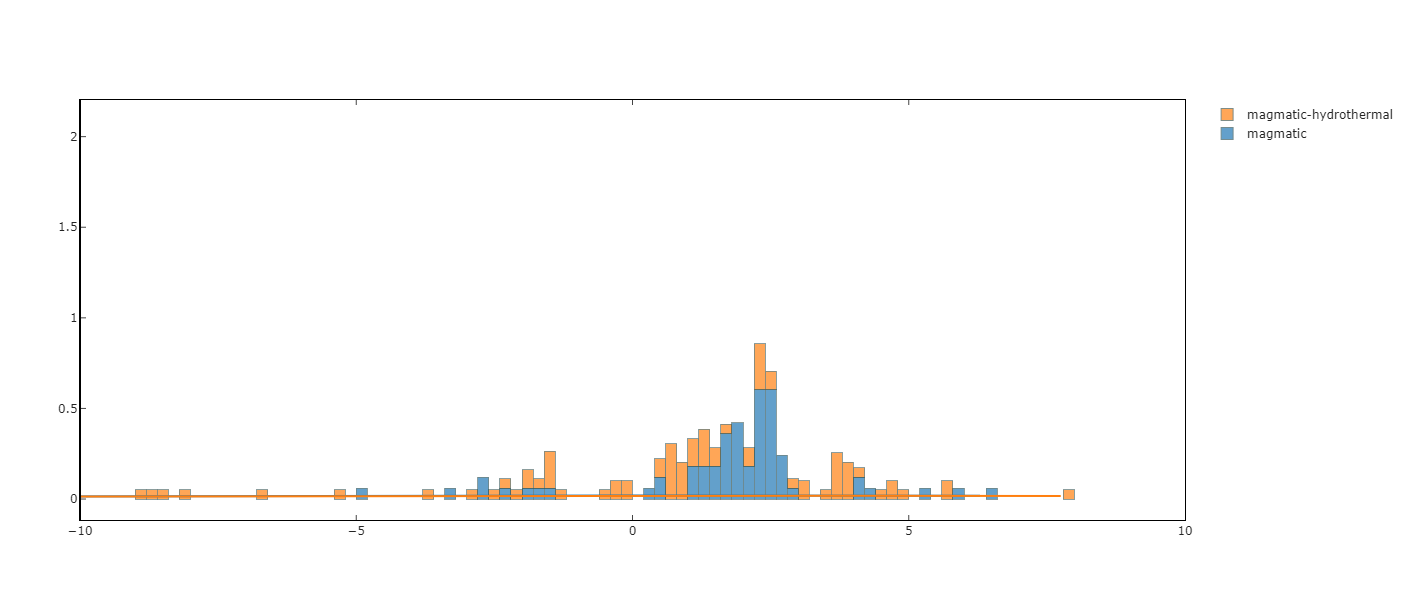

In [16]:
import plotly.figure_factory as ff

x = "Tm CL"


group_labels = ["magmatic",'magmatic-hydrothermal']


# Create distplot with custom bin_size
fig = ff.create_distplot([df_mag[x].fillna(-100).values,df_MH[x].fillna(-100).values], group_labels, bin_size=.2, show_rug=False)


fig.update_xaxes(range=[-10, 10])

fig.update_layout(template="simple_white", 
                  barmode='stack',
                 height=600, width=600)

fig.update_xaxes(ticks='inside',zeroline=False,linecolor="black",showgrid=False,mirror= "allticks")
fig.update_yaxes(ticks='inside',zeroline=False,linecolor="black",showgrid=False,mirror= "allticks")

# x_tick = np.arange(to_plot[x].min()-1,to_plot[x].max()+1,1, dtype=int)
# fig.update_xaxes(tickvals=np.arange(-30,35,1))

fig.update_traces(marker=dict(line=dict(width=0.8,
                                        color='DarkSlateGrey')))

fig.show()

In [180]:
# ---------- Create subplots using plotly.express histogram

from plotly.subplots import make_subplots
import plotly.graph_objects as go

to_plot = df_FI

#Create a 2x2 subplot
fig = make_subplots(rows=2, cols=2)

x_list = ('Tm Hh','Tm H2O','Tm CL','Th CO2')

       
        # Create figures in Express
figure1 = px.histogram(to_plot, x=x_list[0], 
                       color="Host",
                       pattern_shape="type",
#                        labels={x: x+" (<sup>o</sup>C)"},
                       color_discrete_map=colors_map,
                       hover_data=["sample",'piece','field',"analysis","Phases","Host"])

figure2 = px.histogram(to_plot, x=x_list[1], 
                       color="Host",
                       pattern_shape="type",
#                        labels={x: x+" (<sup>o</sup>C)"},
                       color_discrete_map=colors_map,
                       hover_data=["sample",'piece','field',"analysis","Phases","Host"])

figure3 = px.histogram(to_plot, x=x_list[2], 
                       color="Host",
                       pattern_shape="type",
#                        labels={x: x+" (<sup>o</sup>C)"},
                       color_discrete_map=colors_map,
                       hover_data=["sample",'piece','field',"analysis","Phases","Host"])

figure4 = px.histogram(to_plot, x=x_list[3], 
                       color="Host",
                       pattern_shape="type",
                       color_discrete_map=colors_map,
#                        labels={x: x+" (<sup>o</sup>C)"},
                       hover_data=["sample",'piece','field',"analysis","Phases","Host"])


# For as many traces that exist per Express figure, get the traces from each plot and store them in an array.
# This is essentially breaking down the Express fig into it's traces
figure1_traces = []
figure2_traces = []
figure3_traces = []
figure4_traces = []

for trace in range(len(figure1["data"])):
    figure1_traces.append(figure1["data"][trace])
for trace in range(len(figure2["data"])):
    figure2_traces.append(figure2["data"][trace])
for trace in range(len(figure3["data"])):
    figure3_traces.append(figure3["data"][trace])
for trace in range(len(figure4["data"])):
    figure4_traces.append(figure4["data"][trace])


# Get the Express fig broken down as traces and add the traces to the proper plot within in the subplot
for traces in figure1_traces:
    fig.append_trace(traces, row=1, col=1)
for traces in figure2_traces:
    fig.append_trace(traces, row=1, col=2)
for traces in figure3_traces:
    fig.append_trace(traces, row=2, col=1)
for traces in figure4_traces:
    fig.append_trace(traces, row=2, col=2)


# -------------------------------------------------------------------------------------------------

fig.update_xaxes(title_text=x_list[0] + " (<sup>o</sup>C)", range=[to_plot[x_list[0]].min()-1, to_plot[x_list[0]].max()+1], row=1, col=1)
fig.update_xaxes(title_text=x_list[1] + " (<sup>o</sup>C)", range=[to_plot[x_list[1]].min()-1, to_plot[x_list[1]].max()+1], row=1, col=2)
fig.update_xaxes(title_text=x_list[2] + " (<sup>o</sup>C)", range=[to_plot[x_list[2]].min()-1, to_plot[x_list[2]].max()+1], row=2, col=1)
fig.update_xaxes(title_text=x_list[3] + " (<sup>o</sup>C)", range=[to_plot[x_list[3]].min()-1, to_plot[x_list[3]].max()+1], row=2, col=2)


fig.update_layout(template="simple_white", 
                  barmode='stack',
                  showlegend=False,
                 height=900, width=1000)

fig.update_xaxes(ticks='inside',zeroline=False,linecolor="black",showgrid=False,mirror= "allticks")
fig.update_yaxes(ticks='inside',zeroline=False,linecolor="black",showgrid=False,mirror= "allticks")

# x_tick = np.arange(to_plot[x].min()-1,to_plot[x].max()+1,1, dtype=int)
fig.update_xaxes(tickvals=np.arange(-30,35,1))

fig.update_traces(marker=dict(line=dict(width=0.8,
                                        color='DarkSlateGrey')),
                 xbins=dict(size=1)
                 )

fig.write_image(data_dir+"figures/plot_hists.pdf")

fig.show()

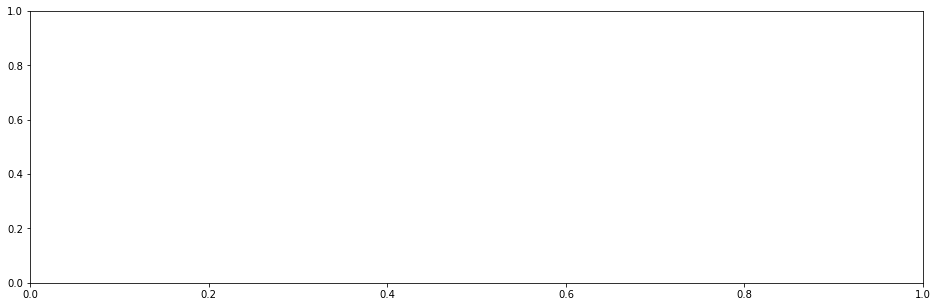

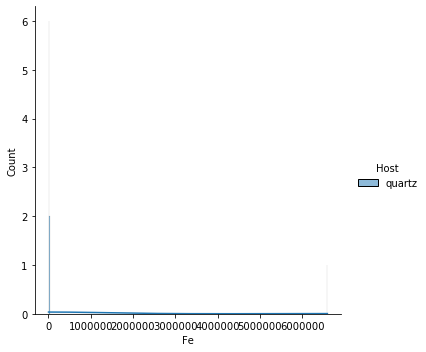

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df_plot = df_qtz.copy()

# df_plot = df_trl.query('sample == "BU18FA20"')


host_list = ['wyllieite', 'trolleite', 'bertossaite', 'augelite', 
             'brazilianite', 'quartz']

elem_list = ['Li', 'B', 'Na', 'Mg',
       'K', 'Ti', 'Mn', 'Rb',
       'Sr', 'Nb', 'Sn', 'Cs', 'Ba', 'Ta', 'W', 'Ca', 'Fe']

fig, ax = plt.subplots(figsize=(16,5))

# Histogram + kernel density function curve

sns.displot(df_plot, x="Fe", hue="Host", multiple='stack', kde=True)

plt.show()


# Data combinations

In [63]:
from itertools import combinations

df_FI_data = df_FI[['VL (%)', 'Tm CO2', 'Te', 'Tm Hh', 'Tm H2O', 'Tm CL','Th CO2', 
                             'salinity(NaCleq wt%)',
                             'Li','B', 'Na', 'Mg', 'Al', 'Si', 'P', 'K', 'Ti', 'Mn', 'Rb', 'Sr', 
                             'Nb','Sn', 'Cs', 'Ba', 'Ta', 'W', 'Ca', 'Fe', 
                             'X_CO2(mol%)', 'X_N2(mol%)', 'X_CH4(mol%)']]


data_combinations = list(combinations(df_FI_data.columns, 3))
len(data_combinations)
data_combinations[1000]



for comb in data_combinations:
    comb[0], comb[1], comb[2]
    
    # To DO:
    # 1. Subset dataframe
    # 2. Normalize subset
    # 3. Add metadata to subset
    
    fig = px.scatter_ternary(df_FI, a=comb[0], b=comb[1], c=comb[2], 
                             color="Host", hover_data=['sample',"piece",'field','analysis'], )

    fig.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers'))

#     fig.write_image(f"ternary_test_{comb[0]}_{comb[1]}_{comb[2]}.pdf")
    fig.show()

('Te', 'B', 'Cs')

# PCA

In [67]:
#Preprocessing of dataset to fullfill requirements of PCA (only relevant data, , no NaN, closure of data)

df_data = df_FI.drop(columns=['sample', 'piece', 'field', 'analysis', 'Host', 'Length', 'Width',
       'Phases', 'VL (%)', 'VV (%)', 'Tm CO2', 'Te', 'Tm Hh', 'Tm H2O',
       'Tm CL', 'Th CO2', 'Hmg Mode', 'Color', 'salinity(NaCleq wt%)',
       'salChen(NaCleq wt%)', 'salBod(NaCleq%)', 'NbTa', 'Nb/Ta', 'Li/Na', 'K/Na', 'Ta#', 'Mn#', 'Na%',
       'Li%', 'K%', 'Rb%', 'Cs%', 'B%', 'P%', 'Alkalis', 'Alkalis%',
       'XCO2(mol%)', 'XN2(mol%)', 'XCH4(mol%)', 'Na/Li', 'Na/K', 'K/Cs',
       'K/Rb', 'Rb/Cs', 'Cs/Na', 'Rb/Na', 'Ca/Na', 'Fe/Na',
       'Ca/Al', 'Al_idx', 'N2/CO2', 'XKClmol',
       'XKCl', 'salt(KNaCl%)'])

print(df_data.columns)



df_data = df_data.dropna(axis = 0, how = 'all') #remove lines that have only NaN values

df_data = df_data.drop(9) #remove lines that have odd values
# print(df_data.loc[9])

HFSE_names = ['Ti','Nb','Sn',"Ta"]
df_data['HFSE'] = df_data[HFSE_names].sum(axis=1) #combine elements that behave the same

df_data = df_data.drop(['Mg', 'Al', 'Si', 'P','Sr','Ba', 'W','Ti','Nb','Sn',"Ta"],axis = 'columns') #remove elements that are not relevant

df_data = df_data.replace(np.NaN, 0) #replace NaN for 0
df_data = df_data.replace(0.0, 1e-10) #replace 0 for 1x10^-10


df_data_norm = df_data.div(df_data.sum(axis=1), axis=0) #normalize data --> divide each value by the sum of the values in their rows

# df_data_norm['sum'] = df_data_norm.sum(axis=1)


# print(np.mean(df_data_norm),np.std(df_data_norm))


# df_data
df_data_norm


#Leave only important elements (remove Na and K)


Index(['Li', 'B', 'Na', 'Mg', 'Al', 'Si', 'P', 'K', 'Ti', 'Mn', 'Rb', 'Sr',
       'Nb', 'Sn', 'Cs', 'Ba', 'Ta', 'W', 'Ca', 'Fe'],
      dtype='object')


,Li,B,Na,K,Mn,Rb,Cs,Ca,Fe,HFSE
2,1.437599e-02,7.685271e-02,0.720333,0.173419,2.175307e-03,7.223645e-03,1.747397e-03,3.645837e-11,3.821608e-03,5.079895e-05
3,3.652368e-11,3.652368e-11,0.635279,0.364721,3.652368e-11,3.652368e-11,3.652368e-11,3.652368e-11,3.652368e-11,3.652368e-11
8,6.578615e-03,4.201818e-02,0.797603,0.098350,9.326706e-04,1.843933e-03,4.520557e-04,3.304797e-11,5.222160e-02,3.304797e-11
13,5.929298e-02,3.845863e-02,0.609109,0.277260,3.314789e-03,6.292310e-03,1.089637e-03,3.276145e-11,3.694230e-03,1.488323e-03
16,2.643922e-02,4.503911e-02,0.743435,0.147241,2.433009e-03,2.186825e-03,5.245335e-04,3.359582e-11,3.270127e-02,3.359582e-11
...,...,...,...,...,...,...,...,...,...,...
269,3.761716e-11,6.322353e-02,0.591499,0.333969,3.761716e-11,9.701972e-03,1.606118e-03,3.761716e-11,3.761716e-11,3.761716e-11
270,1.521274e-02,2.401294e-02,0.469182,0.469584,5.268490e-03,7.809177e-03,5.230699e-04,4.228218e-11,8.388408e-03,1.896872e-05
271,8.365812e-02,5.365128e-02,0.354255,0.493438,4.172025e-03,9.886052e-03,9.402015e-04,4.139783e-11,4.139783e-11,4.139783e-11
272,1.469837e-01,4.337839e-02,0.412611,0.376162,2.095767e-03,1.025169e-02,1.186246e-03,4.290937e-11,7.323515e-03,7.276454e-06


In [68]:
import colleagues.preproc.pre_processing as preproc

df_clr = preproc.clr(df_data_norm)
df_clr


df_clr.sum(axis=1)


df_pca = preproc.pca(df_clr)
df_pca


data_pca = preproc.create_pca_df(df_pca, df_clr)




In [41]:
def position_xy_text(x, y):

    dx_dy = x/y
    dy_dx = y/x
    if x < y:
        offset = 1  # np.arctan(y/x)
    else:
        offset = 1  # np.arctan(x/y)

    # First quadrant
    if (x >= 0) and (y >= 0):
        x += 0.1 * offset
        y += 0.1 * offset
        return x, y
    # Second quadrant
    elif (x < 0) and (y >= 0):
        x -= 0.2 * offset
        y += 0.2 * offset
        return x, y
    # Thrid quadrant
    elif (x < 0) and (y < 0):
        x -= 0.4 * offset
        y -= 0.1 * offset
        return x, y
    # Fourth quadrant
    elif (x >= 0) and (y < 0):
        x += 0.2 * offset
        y -= 0.2 * offset
        return x, y
    else:
        print("xy position of pca loading could not be detrmined")

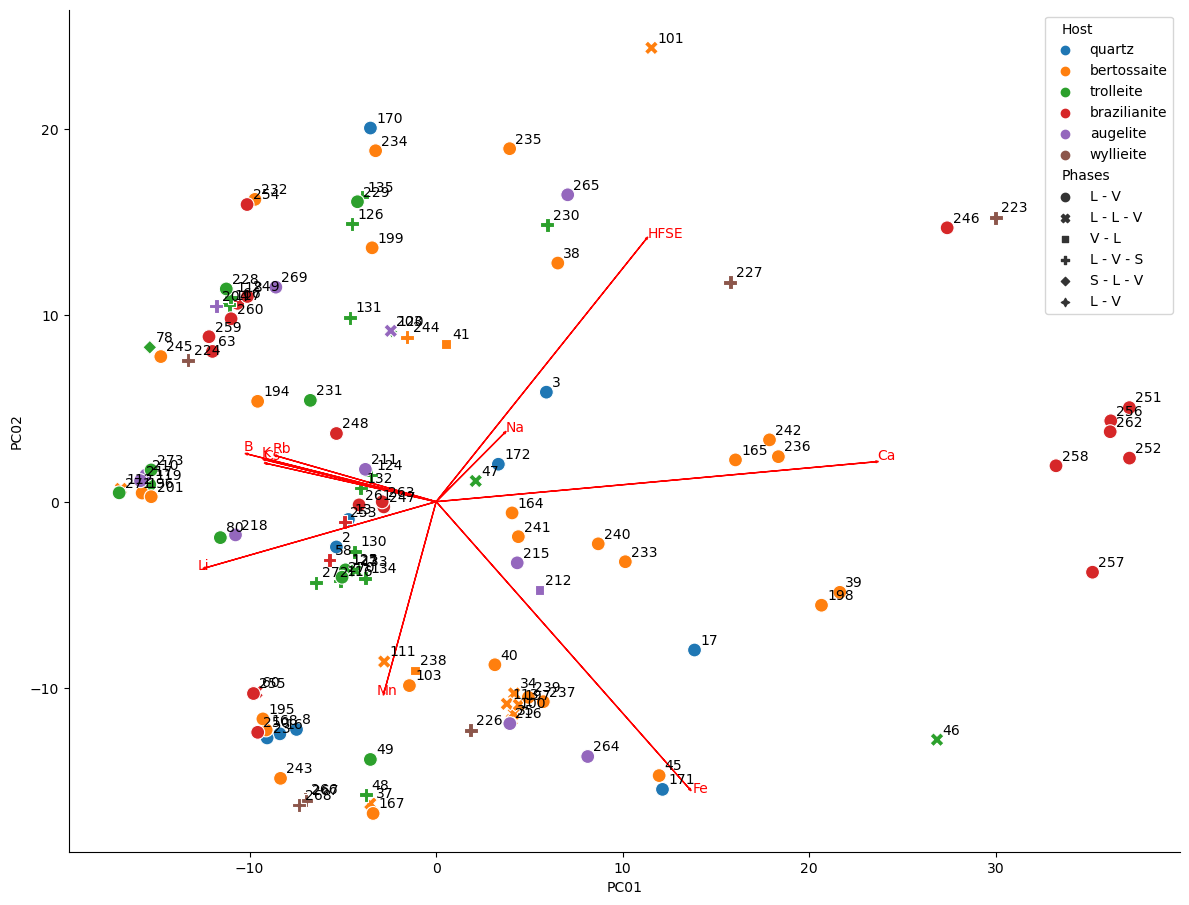

In [70]:
import seaborn as sns

# Calculate PC vectors
xvector = df_pca.components_[0]
yvector = df_pca.components_[1]
# # Transform data
xs = df_pca.transform(df_clr)[:, 0]
ys = df_pca.transform(df_clr)[:, 1]

fig, ax = plt.subplots(figsize=(12, 12), dpi=100)


data_pca[['sample', 'piece', 'field', 'analysis', 'Host', 'Phases']] = df_FI[['sample', 'piece', 'field', 'analysis', 'Host', 'Phases']]


# use 'hue' keyword to indicate which column to use for color_coding
sns.scatterplot(x="PC01", y="PC02", data=data_pca, legend=True, s=100,
               hue="Host", style="Phases") 

ax.set_aspect('equal', adjustable='box')

# Samples
for i in range(len(xs)):
    # Circles project documents (ie rows from csv) as points onto
    ax.text(xs[i]+0.3,
            ys[i]+0.3,
            list(df_clr.index)[i],
            fontsize=10)

for j in range(len(xvector)):
    # Arrows project features (ie columns from csv) as vectors onto PC
    # axes

        ax.arrow(0, 0,
                     xvector[j]*max(xs),
                     yvector[j]*max(ys),
                     color='r',
                     width=0.0005,
                     head_width=0.1)

        position_x, position_y = \
            position_xy_text(xvector[j]*max(xs),
                             yvector[j]*max(ys))

        ax.text(position_x,
                    position_y,
                    list(df_clr.columns)[j],
                    color='r')
        
# ax.set_xlim(-5, 10)
# ax.set_ylim(-10, 5)

sns.despine()

# Set facecolor of figure
plt.gcf().set_facecolor('white')
plt.tight_layout()

# plt.savefig("pca_biplot_test.pdf")
plt.show();

In [147]:
from sklearn.preprocessing import StandardScaler

x = df_data.values
x = StandardScaler().fit_transform(x) # normalizing the features

print(x.shape)

x

(276, 20)


array([[-0.33184669, -0.43597688, -0.82819378, ...,  0.18347225,
        -0.2082203 , -0.20395068],
       [-0.33184669, -0.43597688, -0.82819378, ...,  0.18347225,
        -0.2082203 , -0.20395068],
       [-0.27262914,  2.64506163,  1.42575758, ...,  0.18347225,
        -0.2082203 , -0.18373107],
       ...,
       [ 0.23374751,  1.5777534 ,  0.39065442, ...,  0.18347225,
        -0.2082203 , -0.20395068],
       [ 0.66842692,  1.15027893,  0.57878758, ...,  0.18347225,
        -0.2082203 , -0.12826739],
       [-0.32351833,  1.21299513,  1.49992646, ...,  0.18347225,
        -0.2082203 , -0.20395068]])

In [148]:
np.mean(x),np.std(x)

(2.3491675593517804e-17, 1.0)

In [149]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

normalised_data = pd.DataFrame(x,columns=feat_cols)

normalised_data.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19
271,-0.331847,2.301617,1.494564,-0.139111,-0.113853,-0.076876,0.373576,2.440393,-0.056868,-0.117365,4.144166,0.030975,0.111741,0.204401,-0.410755,0.334294,0.065438,0.183472,-0.20822,-0.203951
272,-0.257225,0.306490,0.639571,2.598640,-0.113853,-0.076876,-0.195382,2.815838,-0.056868,-0.083039,2.005377,-1.034874,0.111741,0.204401,-1.529445,0.334294,-0.993332,0.183472,-0.20822,-0.121447
273,0.233748,1.577753,0.390654,-0.353972,-0.113853,-0.076876,3.000316,3.355214,-0.056868,-0.096256,3.524374,0.030975,0.111741,0.204401,-1.144070,0.334294,0.065438,0.183472,-0.20822,-0.203951
274,0.668427,1.150279,0.578788,0.119334,-0.113853,-0.076876,0.239817,2.381849,-0.056868,-0.141634,3.666788,0.030975,-1.698844,0.204401,-0.950214,0.334294,0.065438,0.183472,-0.20822,-0.128267
275,-0.323518,1.212995,1.499926,-0.317611,-0.113853,-0.076876,-0.195382,-0.255242,-0.056868,-0.178580,1.438141,0.030975,0.111741,0.204401,-1.323223,0.334294,0.065438,0.183472,-0.20822,-0.203951


In [150]:
from sklearn.decomposition import PCA

pca = PCA(0.9)

pca.fit(x)

pca.n_components_

12

In [153]:
pca_FI = PCA(n_components=12)
principalComponents_FI = pca_FI.fit_transform(x)

principal_FI_Df = pd.DataFrame(data = principalComponents_FI)

# principal_FI_Df.index(principal_FI_Df[0].max())
principal_FI_Df[0].max()

18.13577714730832

In [154]:
print('Explained variation per principal component: {}'.format(pca_FI.explained_variance_ratio_))

Explained variation per principal component: [0.1824885  0.16698193 0.10217006 0.08596696 0.06635    0.05558381
 0.052523   0.04976728 0.04766269 0.04170873 0.03043455 0.02953947]


<Figure size 432x288 with 0 Axes>

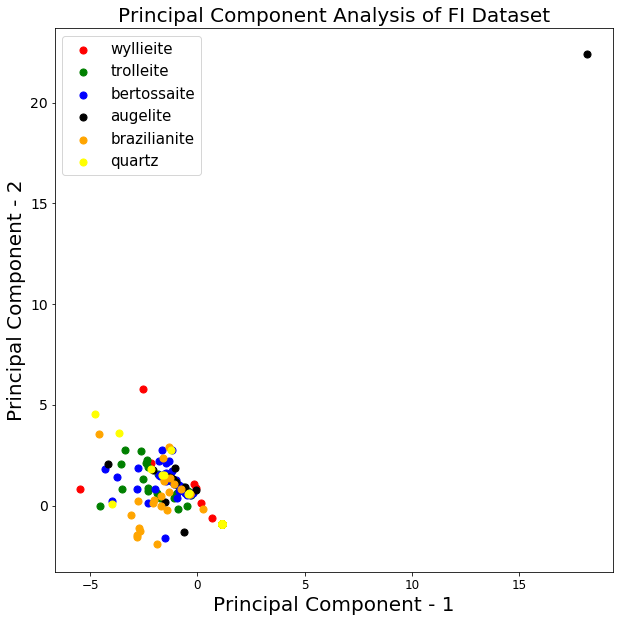

In [155]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of FI Dataset",fontsize=20)
host_list = ['wyllieite', 'trolleite', 'bertossaite', 'augelite', 
             'brazilianite', 'quartz']
colors = ['r', 'g','b','k','orange','yellow']
for host, color in zip(host_list,colors):
    indicesToKeep = df_FI['Host'] == host
    plt.scatter(principal_FI_Df.loc[indicesToKeep, 0]
               , principal_FI_Df.loc[indicesToKeep, 1], c = color, s = 50)

plt.legend(host_list,prop={'size': 15})

plt.show()

# Raman spectra plots

In [3]:
# --- look into working directory and create a list with selected files - .txt
os.chdir(base_dir+'_Article3-MH_transition/Raman/maps/')



Raman_files = glob.glob('*.txt')

V_files = glob.glob('*-v*.txt')

S_files = glob.glob('*-s*.txt')

L_files = glob.glob('*-l*.txt')

print(Raman_files)
len(Raman_files)

['bu20-g-ff1-fi01_cls_burangaite.txt', 'bu20-G-ff1-FI01_CLS_burangaite_raw.txt', 'bu20-g-ff1-fi01_cls_carbonic phase.txt', 'bu20-G-ff1-FI01_CLS_Carbonic phase_raw.txt', 'bu20-g-ff1-fi01_cls_montebrasite.txt', 'bu20-G-ff1-FI01_CLS_Montebrasite_raw.txt', 'bu20-G-ff1-FI01_CLS_Trolleite (host)_raw.txt', 'bu20-g-ff1-fi01_cls_wardite.txt', 'bu20-G-ff1-FI01_CLS_wardite_raw.txt', 'BU20b-area2-blue_150 (500nm)_633nm_Edge_100%_x50_VIS_LWD_H100um_15sX2.txt', 'burangaite-Ph1_BU22C_150 (500nm)_633nm_Edge_100%_x50_VIS_LWD_H100um_20sX2.txt', 'burangaite2-Ph1_BU22C_150 (500nm)_633nm_Edge_100%_x50_VIS_LWD_H100um_20sX2.txt', 'burangaite_0.txt', 'burangaite_BU20C_150 (500nm)_633nm_Edge_100%_x100_VIS_H100um_20sX2.txt', 'burangaite_buranga_r070408__raman__532__0__unoriented__raman_data_processed__21357.txt', 'burangaite_edit.txt', 'burangaite__r070408__broad_scan__532__0__unoriented__raman_data_raw__15025.txt', 'liquid_0.txt', 'liquid_edit.txt', 'montebrasite_0.txt', 'montebrasite_edit.txt', 'rutile_0.txt'

26

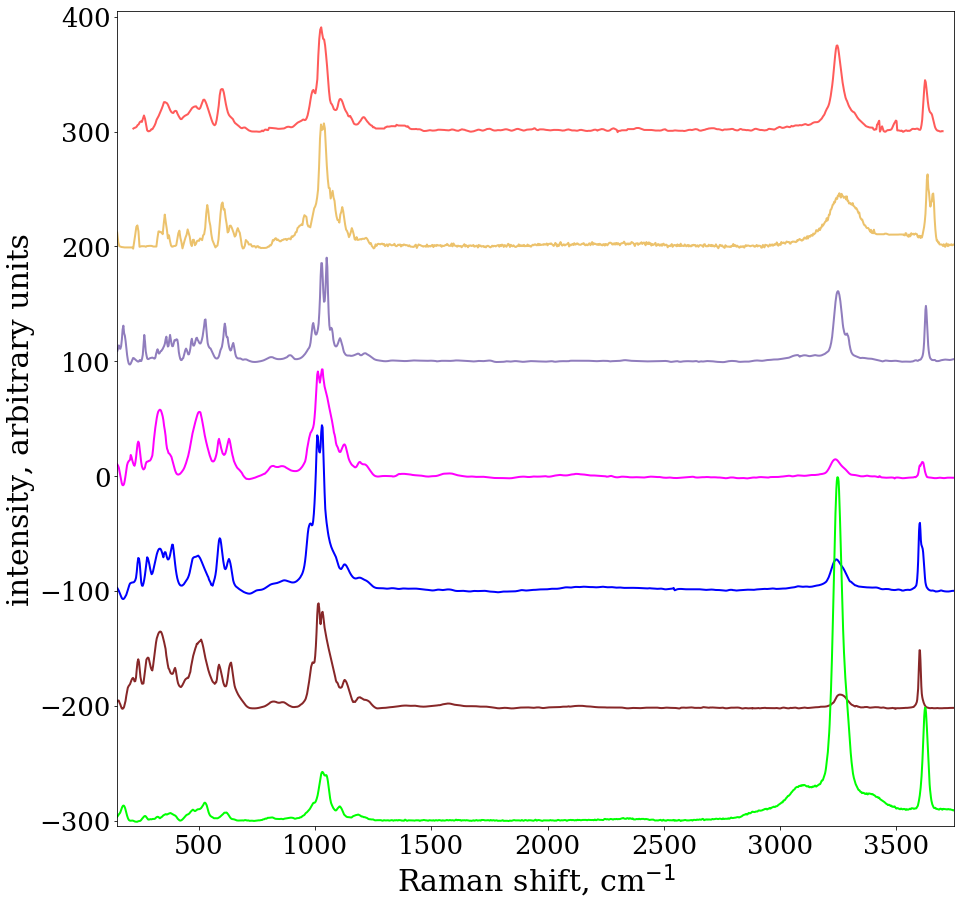

In [15]:
# get the index of spectrum to plot

list_to_use = Raman_files


file1 = 'bu20-g-ff1-fi01_cls_burangaite.txt'

file2 = 'burangaite_edit.txt'

file3 = 'BU20b-area2-blue_150 (500nm)_633nm_Edge_100%_x50_VIS_LWD_H100um_15sX2.txt'

file4 = 'burangaite-Ph1_BU22C_150 (500nm)_633nm_Edge_100%_x50_VIS_LWD_H100um_20sX2.txt'

file5 = 'burangaite2-Ph1_BU22C_150 (500nm)_633nm_Edge_100%_x50_VIS_LWD_H100um_20sX2.txt'

file6 = 'burangaite_BU20C_150 (500nm)_633nm_Edge_100%_x100_VIS_H100um_20sX2.txt'

file7 = 'burangaite__r070408__broad_scan__532__0__unoriented__raman_data_raw__15025.txt'


spectrum1 = np.genfromtxt(list_to_use[list_to_use.index(file1)],comments='#', delimiter='\t')
spectrum2 = np.genfromtxt(list_to_use[list_to_use.index(file2)],comments='#', delimiter='\t')
spectrum3 = np.genfromtxt(list_to_use[list_to_use.index(file3)],comments='#', delimiter='\t')
spectrum4 = np.genfromtxt(list_to_use[list_to_use.index(file4)],comments='#', delimiter='\t')
spectrum5 = np.genfromtxt(list_to_use[list_to_use.index(file5)],comments='#', delimiter='\t')
spectrum6 = np.genfromtxt(list_to_use[list_to_use.index(file6)],comments='#', delimiter='\t')
spectrum7 = np.genfromtxt(list_to_use[list_to_use.index(file7)],comments='#', delimiter='\t')

# create a new plot for showing the spectrum
plt.figure(figsize=(15,15)) #code for creating figure

plt.plot(spectrum1[:,0],(spectrum1[:,1]/1.5)+300,color=("#ff5b5aff"), linewidth=2,label='Montebrasite')
plt.plot(spectrum2[:,0],(spectrum2[:,1]*3)+200,color=("#ecc26cff"), linewidth=2,label='Burangaite')
plt.plot(spectrum3[:,0],(spectrum3[:,1]/28)+100,color=("#907dbdff"), linewidth=2,label='Wardite')
plt.plot(spectrum4[:,0],(spectrum4[:,1]/25),color=("#ff00feff"), linewidth=2,label='Rutile')
plt.plot(spectrum5[:,0],(spectrum5[:,1]/20)-100,color=("#0000feff"), linewidth=2,label='Liquid')
plt.plot(spectrum6[:,0],(spectrum6[:,1]/28)-200,color=("#872728ff"), linewidth=2,label='Vapor')
plt.plot(spectrum7[:,0],(spectrum7[:,1]/100)-300,color=("#00ff01ff"), linewidth=2,label='Trolleite(Host)')


plt.xlabel("Raman shift, cm$^{-1}$", fontsize = 30, fontfamily = 'serif')
plt.ylabel("intensity, arbitrary units", fontsize = 30, fontfamily = 'serif')
# plt.title("Fig. 1: the raw data",fontsize = 12,fontweight="bold")

plt.yticks(fontsize=26, fontfamily = 'serif')
plt.xticks(fontsize=26, fontfamily = 'serif')

# plt.legend(loc='upper center')

plt.xlim(150,3750)
plt.ylim(-305,405)

# plt.savefig("map_spectra_raw.svg")

plt.show()

In [31]:
# --- input files from the list into a spectrum dataframe and append to database dataframe

df_Raman = pd.DataFrame()


for file in V_files:
    df_spectrum = pd.read_csv(base_dir+Raman_dir+file, header=None, sep='\t', comment='#',
                         names=['wavenumber', 'intensity']).T
    
    
    # --- add file information
    current_inclusion = file.replace(".txt", "")
    
    df_spectrum.insert(0,"Sample",current_inclusion)
    
    df_Raman = df_Raman.append(df_spectrum, ignore_index=True, sort=True)

    
# df_Raman.to_csv("Raman_database_L.csv",index = None)
df_Raman

,Sample,0,1,2,3,4,5,6,7,8,...,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978
0,bu02aw-a-ff1-fi01-s_150 (500nm)_532nm_edge_100...,102.9100,107.5340,112.156000,116.7750,121.3920,126.00500,130.61700,135.2270,139.835000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bu02aw-a-ff1-fi01-s_150 (500nm)_532nm_edge_100...,942.7350,514.7790,377.349000,338.7680,855.7100,1980.71000,894.97300,116.1420,46.995000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bu02aw-a-ff1-fi04-s_150 (500nm)_532nm_edge_100...,102.9100,107.5340,112.156000,116.7750,121.3920,126.00500,130.61700,135.2270,139.835000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bu02aw-a-ff1-fi04-s_150 (500nm)_532nm_edge_100...,784.4950,299.6990,286.554000,143.8580,879.9750,2823.66000,932.26900,62.3571,0.300537,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bu19(2)w-a-ff1-fi01-s_150 (500nm)_532nm_edge_1...,102.9100,107.5340,112.156000,116.7750,121.3920,126.00500,130.61700,135.2270,139.835000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,bu32-a-incc-fi03-s_150 (500nm)_532nm_edge_100%...,89.9507,57.6512,83.183000,47.8903,14.7198,53.18420,135.08000,98.5890,99.082200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,bu32-a-incc-fi04-s_150 (500nm)_532nm_edge_100%...,102.9100,107.5340,112.156000,116.7750,121.3920,126.00500,130.61700,135.2270,139.835000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,bu32-a-incc-fi04-s_150 (500nm)_532nm_edge_100%...,168.9350,183.3620,0.236816,198.0640,283.5840,299.25400,595.95300,531.9690,620.048000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,bu32-C-FF1-FI02-S,98.6609,103.2860,107.909000,112.5300,117.1460,121.76200,126.37600,130.9880,135.595000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Normalized'] = np.where(df['Currency'] == '$', df['Budget'] * 0.78125, df['Budget'])

df['Normalized'] = df['Budget'].where(df['Currency']=='$', df['Budget'] * 0.78125)




df['foo'] = np.where((df['Name'] == 'tom') & (df['Age'] == 10), 'x1', '')



def label_race (row):
    if row['eri_hispanic'] == 1 :
        return 'Hispanic'
    if row['eri_afr_amer'] + row['eri_asian'] + row['eri_hawaiian'] + row['eri_nat_amer'] + row['eri_white'] > 1 :
        return 'Two Or More'
    if row['eri_nat_amer'] == 1 :
        return 'A/I AK Native'
    if row['eri_asian'] == 1:
        return 'Asian'
    if row['eri_afr_amer']  == 1:
        return 'Black/AA'
    if row['eri_hawaiian'] == 1:
        return 'Haw/Pac Isl.'
    if row['eri_white'] == 1:
        return 'White'
    return 'Other'

df.apply (lambda row: label_race(row), axis=1)
df['race_label'] = df.apply (lambda row: label_race(row), axis=1)


# Fluid Isochore data (Bakker, 2003 - Fluids package - Chem. Geol.)

In [20]:
isoc = pd.read_table('C:/Users/u0125722/Documents/Softwares/BU19-A-FF7b-FI02-isoc.txt',sep= '\t',skiprows=21,encoding_errors='ignore)

# ,header=23, skiprows=22

isoc

SyntaxError: EOL while scanning string literal (Temp/ipykernel_6812/2864641656.py, line 1)

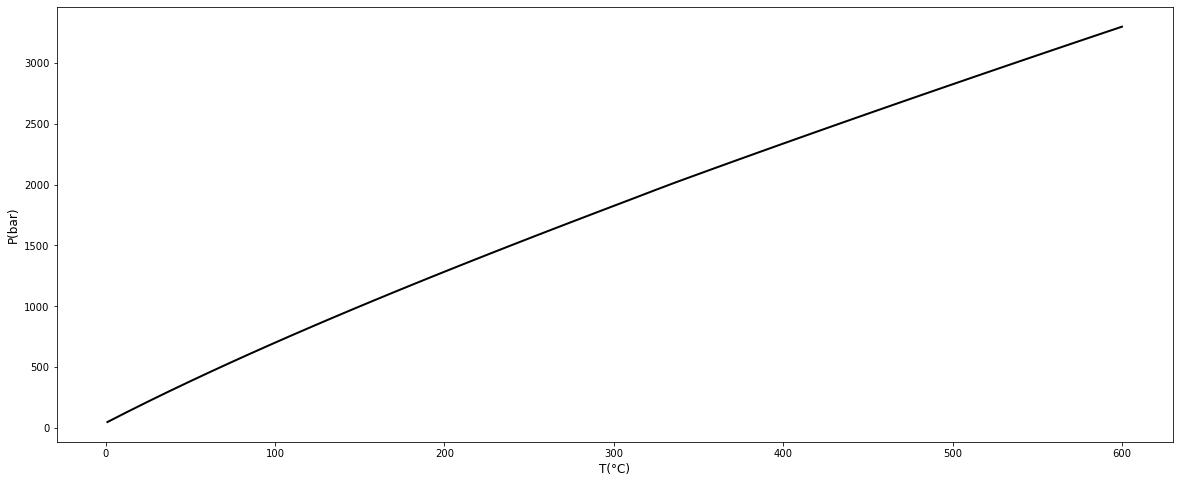

In [10]:

x = 'T(°C)'

y = 'P(bar)'

# create a new plot for showing the spectrum
plt.figure(figsize=(20,8)) #code for creating figure

plt.plot(isoc[x],isoc[y],'k', linewidth=2)

plt.xlabel(x, fontsize = 12)
plt.ylabel(y, fontsize = 12)
# plt.title("Fig. 1: the raw data",fontsize = 12,fontweight="bold")

# plt.xlim(1200,2500)
# plt.ylim(0,5000)


plt.show()